In [1]:
%matplotlib inline
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

import math
import pandas as pd
from statistics import mode
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

## Read the Dataset

In [3]:
file_path ="data/ex6data1.mat"
data = loadmat(file_path)

# Split dataset for train and test

In [4]:
df = pd.DataFrame(np.c_[data['X'], data['y']])

In [5]:
train, test = train_test_split(df, test_size=0.3)

## Plot the data

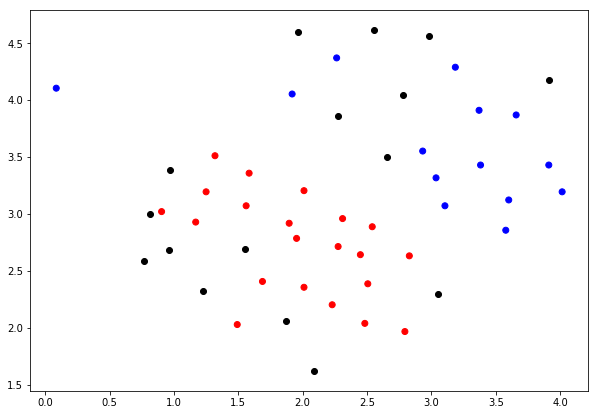

In [6]:
def plotData():
    plt.figure(figsize=(10,7))
    colors = ['b' if label == 1 else 'r' for label in train[2]]
    plt.scatter(train[0], train[1], c=colors)
    plt.scatter(test[0], test[1], c='black')
    plt.show()
plotData()

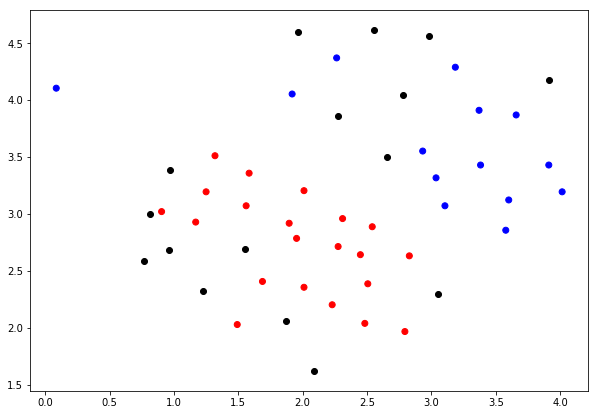

In [7]:

    
plotData()

#### Create and Visualize kNN

In [8]:
def dist(df, p = 2, nearest = 3):
    l = []
    distances = np.power(np.power(train[0]-df[0], 2) + np.power(train[1]-df[1], 2), 1/p)
    pd_df = pd.concat([distances, train[2]], axis = 1)
    sorted_pd_df = pd_df.sort_values(0)
    return mode(list(sorted_pd_df.head(nearest)[2]))

values = pd.DataFrame(columns=[0])
for index, row in test.iterrows():
    values.loc[index] = dist((row[0], row[1]))

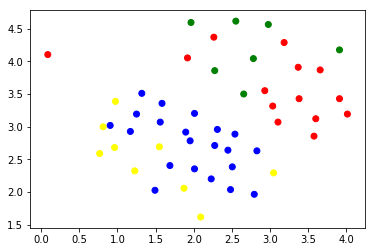

In [9]:
color_map = {0 : 'yellow', 1: 'green'}
plt.scatter(test[0], test[1], c=values[0].map(color_map))

color_map = {0 : 'blue', 1: 'red'}
plt.scatter(train[0], train[1], c=train[2].map(color_map))


## Compute accuracy

In [10]:
def acc(predicted, actual):
    return sum(predicted==actual)/len(predicted)*100

print("Accurasy is {}%".format(acc(test[2], values[0])))

Accurasy is 100.0%


## Create LinearSVC and train your data

In [11]:
svc = svm.LinearSVC()
svc.fit(train.drop(2, axis=1), train[2])
pred = svc.predict(test.drop(2, axis=1))

## Compute accuracy

In [12]:
accuracy_score(test[2], pred)*100

100.0

## Visualize the Decision Boundary

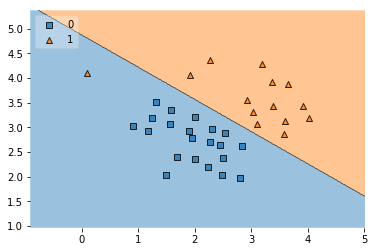

In [13]:
plot_decision_regions(train.drop(2, axis=1).values, train[2].values.astype(np.integer), clf=svc, legend=2)
plt.show()